In [2]:
! curl -O 'https://raw.githubusercontent.com/yw2278/PUI2016_yw2278/master/HW4_yw2278/getCitiBikeCSV.py'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
102  2053  102  2053    0     0   9446      0 --:--:-- --:--:-- --:--:-- 37327


In [32]:
from __future__ import print_function, division
import numpy as np
import pylab as pl
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import os
import json
from getCitiBikeCSV import getCitiBikeCSV
# from scipy.stats import norm
# from scipy.stats import ks_2samp
import statsmodels.api as sm
import statsmodels.formula.api as smf
import geopandas as gp
import scipy.stats
# np.random.seed(99)
%pylab inline

Populating the interactive namespace from numpy and matplotlib


(-1.25, 1.25)

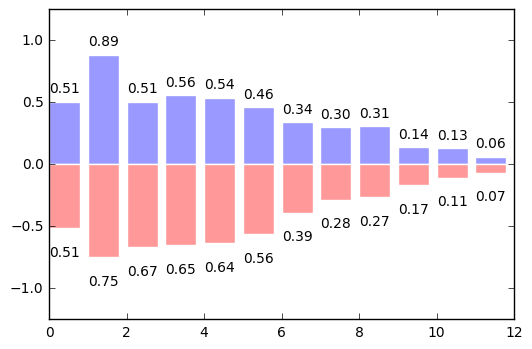

In [23]:
n = 12
X = np.arange(n)
Y1 = (1 - X / float(n)) * np.random.uniform(0.5, 1.0, n)
Y2 = (1 - X / float(n)) * np.random.uniform(0.5, 1.0, n)

plt.bar(X, +Y1, facecolor='#9999ff', edgecolor='white')
plt.bar(X, -Y2, facecolor='#ff9999', edgecolor='white')

for x, y in zip(X, Y1):
    plt.text(x + 0.4, y + 0.05, '%.2f' % y, ha='center', va='bottom')
for x, y in zip(X, Y2):
    plt.text(x + 0.4, -y - 0.25, '%.2f' % y, ha='center', va='bottom')

plt.ylim(-1.25, +1.25)

In [24]:
#1=male; 2=female

In [25]:
datestring = '201507'
getCitiBikeCSV(datestring)
df = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
df.head()

file in place, you can continue


,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,732,7/1/2015 00:00:03,7/1/2015 00:12:16,489,10 Ave & W 28 St,40.750664,-74.001768,368,Carmine St & 6 Ave,40.730386,-74.002150,18669,Subscriber,1970.0,1
1,322,7/1/2015 00:00:06,7/1/2015 00:05:29,304,Broadway & Battery Pl,40.704633,-74.013617,3002,South End Ave & Liberty St,40.711512,-74.015756,14618,Subscriber,1984.0,1
2,790,7/1/2015 00:00:17,7/1/2015 00:13:28,447,8 Ave & W 52 St,40.763707,-73.985162,358,Christopher St & Greenwich St,40.732916,-74.007114,18801,Subscriber,1992.0,1
3,1228,7/1/2015 00:00:23,7/1/2015 00:20:51,490,8 Ave & W 33 St,40.751551,-73.993934,250,Lafayette St & Jersey St,40.724561,-73.995653,19137,Subscriber,1990.0,1
4,1383,7/1/2015 00:00:44,7/1/2015 00:23:48,327,Vesey Pl & River Terrace,40.715338,-74.016584,72,W 52 St & 11 Ave,40.767272,-73.993929,15808,Subscriber,1988.0,1


SyntaxError: keyword can't be an expression (<ipython-input-32-c0d64ecb14c9>, line 1)

In [42]:
gp.read_file("http://catalog.cusp.nyu.edu/dataset/7284a0f9-a744-4430-a812-46fbdf1e53e1/resource/99270324-f830-4580-a376-a821532352db/download/parksgisdictionary20160607.csv")

IOError: no such file or directory: 'catalog.cusp.nyu.edu/dataset/7284a0f9-a744-4430-a812-46fbdf1e53e1/resource/99270324-f830-4580-a376-a821532352db/download/parksgisdictionary20160607.csv'

In [33]:
data = pd.read_csv("https://data.cityofnewyork.us/resource/h9gi-nx95.csv")
data.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,10/21/2016,0:10,BRONX,10457.0,40.846827,-73.897043,"(40.8468268, -73.8970434)",EAST TREMONT AVENUE,BATHGATE AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,3544214,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN
1,10/21/2016,0:10,BRONX,10468.0,40.862818,-73.907781,"(40.8628183, -73.9077814)",NaN,NaN,150 WEST FORDHAM ROAD,...,Unspecified,NaN,NaN,NaN,3545048,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,NaN,NaN,NaN
2,10/21/2016,0:10,BROOKLYN,11211.0,40.710957,-73.951117,"(40.7109568, -73.9511173)",BORINQUEN PLACE,union avenue,NaN,...,Driver Inattention/Distraction,NaN,NaN,NaN,3544368,SPORT UTILITY / STATION WAGON,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN
3,10/21/2016,0:10,BROOKLYN,11223.0,40.604741,-73.972270,"(40.6047408, -73.9722699)",NaN,NaN,1968 MC DONALD AVENUE,...,Unspecified,NaN,NaN,NaN,3545385,PASSENGER VEHICLE,NaN,NaN,NaN,NaN
4,10/21/2016,0:10,MANHATTAN,10001.0,40.751142,-73.997914,"(40.7511421, -73.9979139)",NaN,NaN,356 9 AVENUE,...,Driver Inattention/Distraction,NaN,NaN,NaN,3545307,TAXI,NaN,NaN,NaN,NaN


In [34]:
data.sort(['ZIP CODE'])

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
4,10/21/2016,0:10,MANHATTAN,10001.0,40.751142,-73.997914,"(40.7511421, -73.9979139)",NaN,NaN,356 9 AVENUE,...,Driver Inattention/Distraction,NaN,NaN,NaN,3545307,TAXI,NaN,NaN,NaN,NaN
409,10/21/2016,19:10,MANHATTAN,10001.0,40.749130,-73.988238,"(40.7491296, -73.9882379)",WEST 33 STREET,AVENUE OF THE AMERICAS,NaN,...,Unspecified,NaN,NaN,NaN,3545355,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN
76,10/21/2016,11:10,MANHATTAN,10001.0,40.744760,-73.995153,"(40.7447605, -73.9951533)",WEST 24 STREET,7 AVENUE,NaN,...,Driver Inattention/Distraction,NaN,NaN,NaN,3545110,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN
260,10/21/2016,15:10,MANHATTAN,10001.0,40.748004,-73.985575,"(40.748004, -73.9855746)",NaN,NaN,5 WEST 33 STREET,...,NaN,NaN,NaN,NaN,3545317,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,NaN
997,10/20/2016,20:10,MANHATTAN,10002.0,40.719623,-73.984805,"(40.7196231, -73.9848052)",NaN,NaN,55 CLINTON STREET,...,Unspecified,NaN,NaN,NaN,3544056,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN
996,10/20/2016,20:10,MANHATTAN,10002.0,40.718555,-73.979463,"(40.7185546, -73.9794628)",NaN,NaN,140 COLUMBIA STREET,...,Unspecified,NaN,NaN,NaN,3544592,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN
388,10/21/2016,19:10,MANHATTAN,10002.0,40.722242,-73.986287,"(40.7222418, -73.9862873)",EAST HOUSTON STREET,AVENUE A,NaN,...,Driver Inattention/Distraction,NaN,NaN,NaN,3544618,PASSENGER VEHICLE,NaN,NaN,NaN,NaN
487,10/21/2016,23:10,MANHATTAN,10002.0,40.719596,-73.991681,"(40.7195964, -73.9916811)",NaN,NaN,47 DELANCEY STREET,...,Following Too Closely,NaN,NaN,NaN,3545589,TAXI,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN
857,10/20/2016,16:10,MANHATTAN,10002.0,40.719722,-73.982803,"(40.7197216, -73.982803)",STANTON STREET,RIDGE STREET,NaN,...,Unspecified,Unspecified,Unspecified,NaN,3544049,PASSENGER VEHICLE,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,NaN
554,10/21/2016,7:10,MANHATTAN,10003.0,40.737882,-73.988749,"(40.7378817, -73.9887487)",NaN,NaN,230 PARK AVENUE SOUTH,...,Driver Inattention/Distraction,NaN,NaN,NaN,3545105,SPORT UTILITY / STATION WAGON,BICYCLE,NaN,NaN,NaN


In [35]:
data.columns

Index([u'DATE', u'TIME', u'BOROUGH', u'ZIP CODE', u'LATITUDE', u'LONGITUDE',
       u'LOCATION', u'ON STREET NAME', u'CROSS STREET NAME',
       u'OFF STREET NAME', u'NUMBER OF PERSONS INJURED',
       u'NUMBER OF PERSONS KILLED', u'NUMBER OF PEDESTRIANS INJURED',
       u'NUMBER OF PEDESTRIANS KILLED', u'NUMBER OF CYCLIST INJURED',
       u'NUMBER OF CYCLIST KILLED', u'NUMBER OF MOTORIST INJURED',
       u'NUMBER OF MOTORIST KILLED', u'CONTRIBUTING FACTOR VEHICLE 1',
       u'CONTRIBUTING FACTOR VEHICLE 2', u'CONTRIBUTING FACTOR VEHICLE 3',
       u'CONTRIBUTING FACTOR VEHICLE 4', u'CONTRIBUTING FACTOR VEHICLE 5',
       u'UNIQUE KEY', u'VEHICLE TYPE CODE 1', u'VEHICLE TYPE CODE 2',
       u'VEHICLE TYPE CODE 3', u'VEHICLE TYPE CODE 4', u'VEHICLE TYPE CODE 5'],
      dtype='object')

In [36]:
data2 = data[['ZIP CODE','BOROUGH','NUMBER OF PERSONS INJURED','NUMBER OF PEDESTRIANS INJURED','NUMBER OF MOTORIST INJURED']]
data2.sort(['BOROUGH'])

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,ZIP CODE,BOROUGH,NUMBER OF PERSONS INJURED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF MOTORIST INJURED
0,10457.0,BRONX,0,0,0
635,10469.0,BRONX,0,0,0
634,10468.0,BRONX,0,0,0
633,10454.0,BRONX,0,0,0
218,10456.0,BRONX,1,0,1
422,10468.0,BRONX,0,0,0
318,10475.0,BRONX,0,0,0
317,10454.0,BRONX,0,0,0
316,10454.0,BRONX,0,0,0
114,10468.0,BRONX,0,0,0


In [42]:
sumboro=data2.groupby(data2['BOROUGH']).sum()
#sumboro.sum()


In [38]:
#sumboro.count()


,ZIP CODE,NUMBER OF PERSONS INJURED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF MOTORIST INJURED
BOROUGH,,,,
BRONX,88,88,88,88
BROOKLYN,168,168,168,168
MANHATTAN,110,110,110,110
QUEENS,208,208,208,208
STATEN ISLAND,25,25,25,25


In [39]:
#sumboro.count().sum()

ZIP CODE                         599
NUMBER OF PERSONS INJURED        599
NUMBER OF PEDESTRIANS INJURED    599
NUMBER OF MOTORIST INJURED       599
dtype: int64

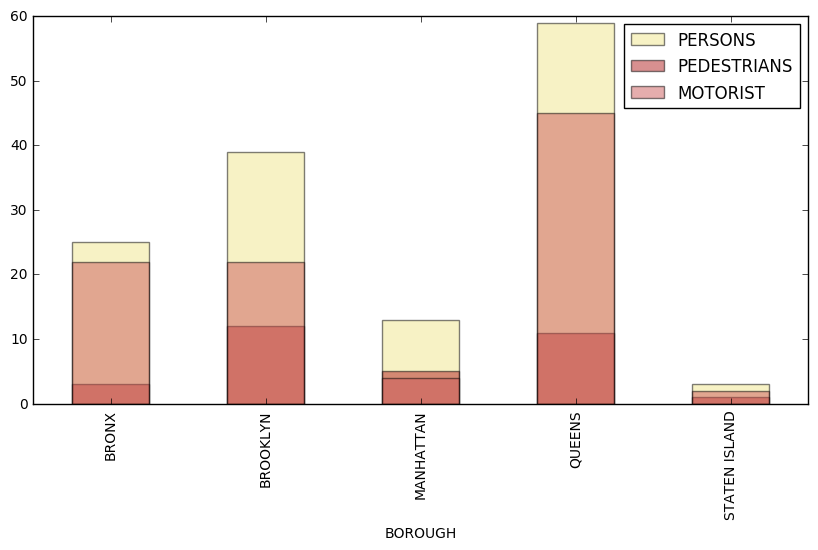

In [69]:

fig = pl.figure(figsize(10,5))
sumboro1 = sumboro[['NUMBER OF PEDESTRIANS INJURED','NUMBER OF MOTORIST INJURED']]
ax = sumboro['NUMBER OF PERSONS INJURED'].plot(kind="bar",color='khaki', alpha=0.5,label='PERSONS')
ax = sumboro['NUMBER OF PEDESTRIANS INJURED'].plot(kind="bar",color='firebrick', alpha=0.5,label='PEDESTRIANS')
ax = sumboro['NUMBER OF MOTORIST INJURED'].plot(kind="bar",color='IndianRed', alpha=0.5,label='MOTORIST')
#ax = sumboro['NUMBER OF MOTORIST INJURED'].hist()
#sumboro1.plot(kind = 'bar', color='firebrick' ,stacked = True)
tmp = ax.xaxis.set_ticklabels(['BRONX', 'BROOKLYN', 'MANHATTAN', 'QUEENS', 'STATEN ISLAND'], fontsize=10)
pl.legend()

In [ ]:
ax = sumboro['NUMBER OF MOTORIST INJURED'].plot

In [ ]:
ax = sumboro['NUMBER OF MOTORIST INJURED'].plot

In [ ]:
ax = sumboro['NUMBER OF MOTORIST INJURED'].plot

In [ ]:
ax = sumboro['NUMBER OF MOTORIST INJURED'].plot

In [ ]:
ax = sumboro['NUMBER OF MOTORIST INJURED'].plot

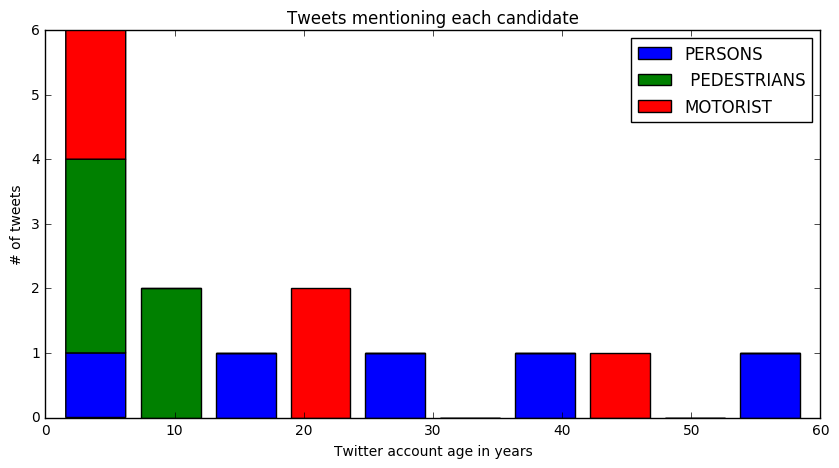

In [68]:
#cl_tweets = tweets["user_age"][tweets["candidate"] == "clinton"]
#sa_tweets = tweets["user_age"][tweets["candidate"] == "sanders"]
#tr_tweets = tweets["user_age"][tweets["candidate"] == "trump"]
plt.hist([
            sumboro['NUMBER OF PERSONS INJURED'], 
            sumboro['NUMBER OF PEDESTRIANS INJURED'],
            sumboro['NUMBER OF MOTORIST INJURED']
        ], 
        stacked=True, 
        label=["PERSONS", " PEDESTRIANS", "MOTORIST"]
    )
plt.legend()
plt.title("Tweets mentioning each candidate")
plt.xlabel("Twitter account age in years")
plt.ylabel("# of tweets")
plt.show()


In [92]:
import plotly.graph_objs as go
trace0 = go.Bar(x = sumboro['NUMBER OF PERSONS INJURED'], y = sumboro['NUMBER OF PERSONS INJURED'])
trace1 = go.Bar(x =sumboro['NUMBER OF PERSONS INJURED'], y = sumboro['NUMBER OF PEDESTRIANS INJURED'])
trace2 = go.Bar(x =sumboro['NUMBER OF PERSONS INJURED'], y = sumboro['NUMBER OF MOTORIST INJURED'])
# fig = [trace0, trace1, trace2]
fig= go.Figure(data=l, layout=layout)
py.iplot(fig)

NameError: name 'l' is not defined